In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch


In [2]:
def evolution(x, t, l = 1):
   return  np.exp(l * t) * x 

def evolution_advanced(x, t, l = 1):
    if x > 0 and x < 0.5:
        return np.exp(l * t) * x 
    else:
        return np.exp(2 * l * t) * x
    


def logistic(x_0,r = 3.2, reps = 600):
    x = np.zeros(reps)
    x[0] = x_0
    for i in range(reps - 1):
        x[i + 1] = r * x[i] * (1 - x[i])
    return x

In [3]:
def traj(x, l = 1):
    traj = np.zeros((100), dtype = np.float64)
    for i in np.arange(100):
        traj[i] = evolution(x,i,l)
    return traj

[0. 0. 0.]
[1.00000000e-01 1.48413159e+01 2.20264658e+03]


/var/folders/lk/x8186w8j3_s9plr83dmmwnm00000gn/T/ipykernel_86119/679213323.py:8: RuntimeWarning: invalid value encountered in true_divide
  d = d/t


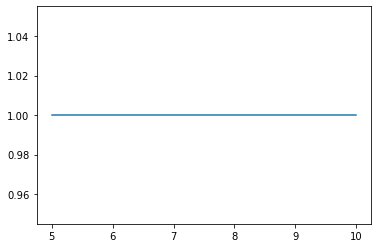

In [4]:
def le(x,y,t):
    d = np.abs(x - y)
    
    d = d/d[0]
    d = np.log(d)
    

    d = d/t
    return d

t = np.linspace(0,10,3)
x = evolution(0.,t)
y = evolution(0.1,t)

print(x)
print(y)

# r = 2 #logistic parameter
# x = logistic(0.1,r)
# y = logistic(0.1001,r)
# t = np.arange(600)

le_val = le(x,y,t)
plt.plot(t,le_val)
plt.show()

/var/folders/lk/x8186w8j3_s9plr83dmmwnm00000gn/T/ipykernel_86119/679213323.py:8: RuntimeWarning: invalid value encountered in true_divide
  d = d/t


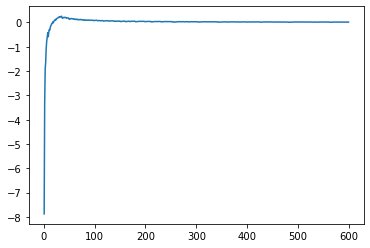

In [5]:
r = 3.8
x = logistic(0.5,r)
y = logistic(0.5001,r)
t = np.arange(600)

le_val = le(x,y,t)

plt.plot(t,le_val)
plt.show()

In [6]:
x_amount = 100
reps = 60
eps = 0.1
t = np.arange(reps)

# ini_values = np.linspace(0.4,0.5,x_amount)
ini_values = np.random.rand(x_amount)

traj = np.zeros((reps,x_amount))
traj[0,:] = ini_values

for i in range(x_amount):
    traj[:,i] = evolution_advanced(traj[0,i],t)

print(traj)


le_val = np.zeros_like(traj)

for i in range(x_amount):
    count = 0
    for j in range(x_amount):
        if (np.abs(traj[0,i] - traj[0,j]) < eps and not(i == j)):
            count += 1
            le_val[:,i] += le(traj[:,i],traj[:,j],t)
            print('avg le update with count ',count,' and value ',le_val[-1,i])
    if count > 1:
        le_val[:,i] = le_val[:,i]/count
            

# print(traj)
print(le_val[-1,:])

[[1.32738476e-01 4.37297493e-01 6.41880153e-01 ... 5.09259148e-01
  5.39006212e-01 2.26752699e-01]
 [3.60820587e-01 1.18869783e+00 4.74288846e+00 ... 3.76294441e+00
  3.98274714e+00 6.16377740e-01]
 [9.80812044e-01 3.23121571e+00 3.50454689e+01 ... 2.78046074e+01
  2.94287420e+01 1.67548841e+00]
 ...
 [7.54713807e+23 2.48635110e+24 2.07503241e+49 ... 1.64630302e+49
  1.74246758e+49 1.28925235e+24]
 [2.05152483e+24 6.75860303e+24 1.53325309e+50 ... 1.21646254e+50
  1.28751907e+50 3.50455125e+24]
 [5.57662266e+24 1.83717878e+25 1.13292931e+51 ... 8.98850995e+50
  9.51355066e+50 9.52635797e+24]]
avg le update with count  1  and value  1.0
avg le update with count  2  and value  2.0
avg le update with count  3  and value  3.0
avg le update with count  4  and value  4.0
avg le update with count  5  and value  5.0
avg le update with count  6  and value  6.0
avg le update with count  7  and value  7.0
avg le update with count  8  and value  8.0
avg le update with count  9  and value  9.0
avg 

/var/folders/lk/x8186w8j3_s9plr83dmmwnm00000gn/T/ipykernel_86119/679213323.py:8: RuntimeWarning: invalid value encountered in true_divide
  d = d/t


 and value  13.0
avg le update with count  14  and value  14.0
avg le update with count  15  and value  15.0
avg le update with count  16  and value  16.0
avg le update with count  17  and value  17.0
avg le update with count  18  and value  18.0
avg le update with count  19  and value  19.0
avg le update with count  20  and value  20.0
avg le update with count  21  and value  21.0
avg le update with count  1  and value  2.0
avg le update with count  2  and value  4.0
avg le update with count  3  and value  6.0
avg le update with count  4  and value  8.0
avg le update with count  5  and value  10.0
avg le update with count  6  and value  12.0
avg le update with count  7  and value  14.0
avg le update with count  8  and value  16.0
avg le update with count  9  and value  18.0
avg le update with count  10  and value  20.0
avg le update with count  11  and value  22.0
avg le update with count  12  and value  24.0
avg le update with count  13  and value  26.0
avg le update with count  14  

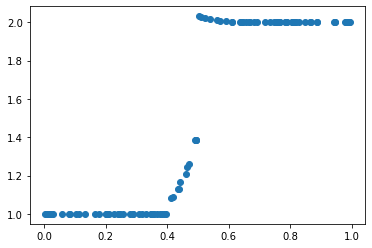

In [7]:
indices = np.argsort(ini_values)

ini_values = ini_values[indices]
le_final = le_val[-1,:]
le_final = le_final[indices]

plt.scatter(ini_values, le_final)
plt.show()

Now i want to check how to make a two dimensional plot

torch.Size([100, 100, 2])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


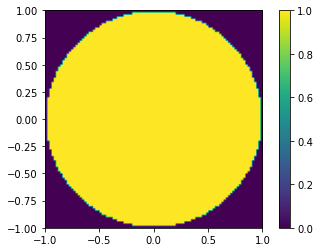

In [8]:


def test_2d(x, t, l = 1):
    return (torch.linalg.norm(x, dim = -1) < 1).float()


x_amount = 100

x = torch.linspace(-1,1,x_amount)
y = torch.linspace(-1,1,x_amount)
X, Y = torch.meshgrid(x, y)

inputs = torch.stack([X,Y], dim=-1)
print(inputs.shape)



# Compute the norm for each pair of corresponding elements from X and Y
Z = test_2d(inputs,1)
print(Z)

# Create heatmap using imshow
plt.imshow(Z, origin='lower', extent=(-1, 1, -1, 1), cmap='viridis')
plt.colorbar()  # Show color scale
plt.show()

In [9]:
a = torch.tensor([1,2])
b = torch.linspace(0,1,5)

a = a[:,None]
print(a*b)

tensor([[0.0000, 0.2500, 0.5000, 0.7500, 1.0000],
        [0.0000, 0.5000, 1.0000, 1.5000, 2.0000]])


inputs = tensor([[[-1.0000, -1.0000],
         [-1.0000, -0.7778],
         [-1.0000, -0.5556],
         [-1.0000, -0.3333],
         [-1.0000, -0.1111],
         [-1.0000,  0.1111],
         [-1.0000,  0.3333],
         [-1.0000,  0.5556],
         [-1.0000,  0.7778],
         [-1.0000,  1.0000]],

        [[-0.7778, -1.0000],
         [-0.7778, -0.7778],
         [-0.7778, -0.5556],
         [-0.7778, -0.3333],
         [-0.7778, -0.1111],
         [-0.7778,  0.1111],
         [-0.7778,  0.3333],
         [-0.7778,  0.5556],
         [-0.7778,  0.7778],
         [-0.7778,  1.0000]],

        [[-0.5556, -1.0000],
         [-0.5556, -0.7778],
         [-0.5556, -0.5556],
         [-0.5556, -0.3333],
         [-0.5556, -0.1111],
         [-0.5556,  0.1111],
         [-0.5556,  0.3333],
         [-0.5556,  0.5556],
         [-0.5556,  0.7778],
         [-0.5556,  1.0000]],

        [[-0.3333, -1.0000],
         [-0.3333, -0.7778],
         [-0.3333, -0.5556],
         [-0.3333, -0.3333],

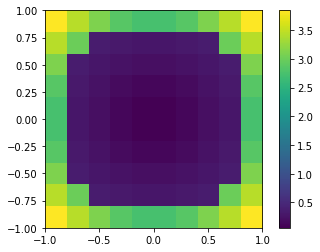

In [10]:
def evolution_2d(x, t, l=1.):
    norm_x = torch.linalg.norm(x, dim = -1, keepdim=True)  # shape (x_amount,x_amount,1)
    indices_below = (norm_x < 1).expand_as(x)  # shape (x_amount,x_amount,dim_x)

    t = t[None, None, None, :]  # shape (1,1,1,3)
    x_extended = x.unsqueeze(-1).expand(-1, -1, -1, len(t))  # shape (x_amount,x_amount,dim_x,len_t)

    result_below = torch.exp(-l * t) * x_extended  # shape (x_amount,x_amount,dim_x,len_t)
    result_above = torch.exp(l * t) * x_extended  # shape (x_amount,x_amount,dim_x,len_t)

    # Use the boolean mask to select values from result_below or result_above
    result = torch.where(indices_below.unsqueeze(-1), result_below, result_above)  # shape (x_amount,x_amount,dim_x,len_t)

    return result
    

x_amount = 10

x = torch.linspace(-1,1,x_amount)
y = torch.linspace(-1,1,x_amount)
X, Y = torch.meshgrid(x, y)

inputs = torch.stack([X,Y], dim=-1)
print(f'{inputs = }')
print(inputs.shape)



# Compute the norm for each pair of corresponding elements from X and Y
t = torch.linspace(0,1,3)
Z = evolution_2d(inputs,t)
print(Z.shape)

Z = Z[:,:,:,-1] #reduce to last time instance T
Z = torch.linalg.norm(Z, dim = -1) #compute norm of each x(T)

# Create heatmap using imshow
plt.imshow(Z, origin='lower', extent=(-1, 1, -1, 1), cmap='viridis')
plt.colorbar()  # Show color scale
plt.show()

In [11]:
'''
input: two trajectories x(t), y(t) where each has size (x_dim,len_t)
output: maximum lyapunov exponent for each time t, size (1,len_t)'''
def le(x,y,t):
    d = x - y
    d = torch.linalg.norm(x - y, dim = 0)
    print(f'{d.shape = }')
    d = d/d[0]
    d = np.log(d)
    

    d = d/t
    return d



'''
Compute the maximum Lyapunov exponent with initial value tolerance eps
input: 
trajectories of size (x_amount,x_amount,x_dim,time_dim)
each trajectory has initial value x_0 = traj[i,j,:,0]

output:
MLE for each trajectory as averaged LE for all initial values that is eps close to the initial value
output size (x_amount,x_amount,t_dim)
'''
def MLE(traj, t, eps = 0.1):
    x_amount = traj.size(0)
    x_amount, y_amount, x_dim, t_dim = traj.shape
    le_val = torch.zeros((x_amount, y_amount, t_dim)) 
    print(f'{le_val.shape = }')
    for i in range(x_amount):
        for j in range(y_amount):
            count = 0
            for i_comp in range(x_amount):
                for j_comp in range(y_amount):
                    if (torch.norm(traj[i,j,:,0] - traj[i_comp,j_comp,:,0]) < eps and not(i == i_comp and j == j_comp)):
                        count += 1
                        le_val[i,j] += le(traj[i,j,:,:],traj[i_comp,j_comp,:,:],t)
                        print('avg le update with count ',count,' and value ',le_val[i,j,-1])
            if count > 1:
                le_val[i,j,:] = le_val[i,j,:]/count
    return le_val

# x1 = inputs[0,0,:]
# x2 = inputs[1,0,:]

# print(x1,x2)

# le(x1,x2,1)
t = torch.linspace(0,1,10)
evo = evolution_2d(inputs,t)
print(f'{evo.shape = }')

evo1 = evo[0,0,:]
evo2 = evo[1,1,:]

print(f'{evo1.shape = }')

le(evo1,evo2, t)

evo.shape = torch.Size([10, 10, 2, 10])
evo1.shape = torch.Size([2, 10])
d.shape = torch.Size([10])


tensor([   nan, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])

torch.Size([30, 30, 2, 2])
le_val.shape = torch.Size([30, 30, 2])
d.shape = torch.Size([2])
avg le update with count  1  and value  tensor([0., 0.])
d.shape = torch.Size([2])
avg le update with count  2  and value  tensor([0., 0.])
d.shape = torch.Size([2])
avg le update with count  3  and value  tensor([0., 0.])
d.shape = torch.Size([2])
avg le update with count  1  and value  tensor([0., 0.])
d.shape = torch.Size([2])
avg le update with count  2  and value  tensor([0., 0.])
d.shape = torch.Size([2])
avg le update with count  3  and value  tensor([0., 0.])
d.shape = torch.Size([2])
avg le update with count  4  and value  tensor([0., 0.])
d.shape = torch.Size([2])
avg le update with count  5  and value  tensor([0., 0.])
d.shape = torch.Size([2])
avg le update with count  1  and value  tensor([0., 0.])
d.shape = torch.Size([2])
avg le update with count  2  and value  tensor([0., 0.])
d.shape = torch.Size([2])
avg le update with count  3  and value  tensor([0., 0.])
d.shape = torch.Size(

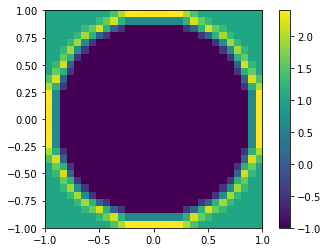

In [16]:
x_amount = 30
eps = 0.1
x = torch.linspace(-1,1,x_amount)
y = torch.linspace(-1,1,x_amount)
X, Y = torch.meshgrid(x, y)

inputs = torch.stack([X,Y], dim=-1)

# Compute the norm for each pair of corresponding elements from X and Y
t = torch.linspace(0,1,2)
Z = evolution_2d(inputs,t)
print(Z.shape)

output = MLE(Z,t,eps)
print(output)

output = output[:,:,-1] #reduce to last time instance T
# Create heatmap using imshow
plt.imshow(output, origin='lower', extent=(-1, 1, -1, 1), cmap='viridis')
plt.colorbar()  # Show color scale
plt.show()

In [13]:
x = torch.zeros((1,2,3))
x_amount = 3
for i in range(x_amount):
    for j in range(x_amount):
        print(i,j)


0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


torch.Size([5, 5, 2, 3])
torch.Size([5, 5, 5, 5, 3])
lyap_exps.shape=torch.Size([5, 5, 5, 5, 3, 1])
output size =  torch.Size([5, 5])
tensor([[nan, -inf, -inf, -inf, -inf],
        [-inf, nan, -inf, -inf, -inf],
        [-inf, -inf, nan, -inf, -inf],
        [-inf, -inf, -inf, nan, -inf],
        [-inf, -inf, -inf, -inf, nan]])


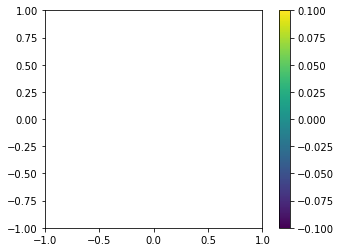

In [60]:
def le_tensor(x, y, t):
    d = torch.linalg.norm(x - y, dim=-2)
    print(d.size())
    d = d / torch.linalg.norm(d[..., 0], dim=-1).unsqueeze(-1)
    d = torch.log(d)
    return (d / t).unsqueeze(-1)


def MLE_tensor(traj, t, eps = 0.1):
    x_amount, y_amount, x_dim, t_dim = traj.shape
    
    x = traj.unsqueeze(2).unsqueeze(3)  # shape (x_amount, y_amount, 1, 1, x_dim, t_dim)
    y = traj.unsqueeze(0).unsqueeze(1)  # shape (1, 1, x_amount, y_amount, x_dim, t_dim)
    
    
    # Compute pairwise distances for initial conditions
    dists = torch.linalg.norm(x[..., :, 0] - y[..., :, 0], dim=4)
    
    # Create mask for pairs with close initial conditions (exclude self-comparisons)
    mask = (dists < eps) & (torch.arange(x_amount).view(-1, 1) != torch.arange(y_amount))
    
    # Compute the Lyapunov exponent for each pair of trajectories
    lyap_exps = le_tensor(x, y, t)  # shape (x_amount, y_amount, x_amount, y_amount, t_dim, 1)
    print(f'{lyap_exps.shape=}')
    
    # Compute the mean Lyapunov exponent for each trajectory, excluding pairs that are too far apart
    mask_expanded = mask.unsqueeze(-1).unsqueeze(-1)  # shape (x_amount, y_amount, x_amount, y_amount, 1, 1)
    le_val = (lyap_exps * mask_expanded).sum(dim=(2, 3)) / mask_expanded.sum(dim=(2, 3))
    
    return le_val.squeeze(-1)  # shape (x_amount, y_amount, t_dim)






x_amount = 5
eps = 0.1
x = torch.linspace(-1,1,x_amount)
y = torch.linspace(-1,1,x_amount)
X, Y = torch.meshgrid(x, y)

inputs = torch.stack([X,Y], dim=-1)

# Compute the norm for each pair of corresponding elements from X and Y
t = torch.linspace(0,1,3)
Z = evolution_2d(inputs,t)
print(Z.shape)

output = MLE_tensor(Z,t,eps)

output = output[:,:,-1] #reduce to last time instance T
print('output size = ', output.size())
print(output)
# Create heatmap using imshow
plt.imshow(output, origin='lower', extent=(-1, 1, -1, 1), cmap='viridis')
plt.colorbar()  # Show color scale
plt.show()

In [57]:
test = torch.zeros(size = (1,2,4))
test[:,0,:] = 1
test[:,1,:] = 2
print('test = ', test)

print(test.sum(dim = 2))

print(test / torch.linalg.norm(test[...,0], dim = -1))

test =  tensor([[[1., 1., 1., 1.],
         [2., 2., 2., 2.]]])
tensor([[4., 8.]])
tensor([[[0.4472, 0.4472, 0.4472, 0.4472],
         [0.8944, 0.8944, 0.8944, 0.8944]]])
